# Exponential and Power Law Models 

### In this lesson we will talk a bit about exponential and power law models.  
### These are models that fit functions to data that are widely used to describe psychological data in the perception. 
### In COGS 107 you will tackle the Cognitive Model aspects of this more seriously than I will here.  Here I want to focus on the mathematics of these forms and how we can fit them to data. 
### In psychology applications, these laws are interested in how cognitive processes change over time, where time is usually, but not always, measured in terms of number of trials N.  

## Power function 

### $$ y = aN^{-b} $$

### Here y is a behavioral measure like response time, N indexes the trials starting at 1.  a,b,are the **parameters** of the model.  

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
from scipy import stats
from numpy import random 
seed = 123
rng = random.default_rng(seed)

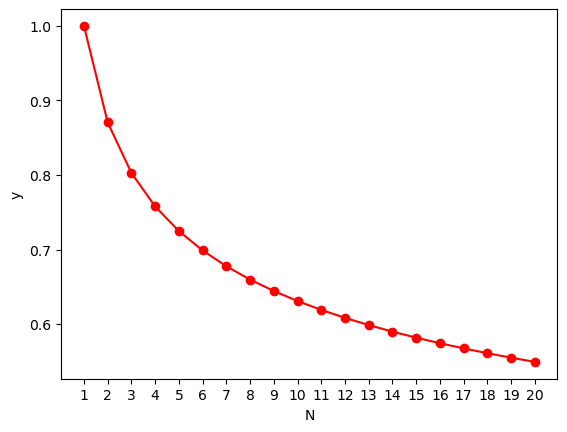

In [2]:
N = np.arange(1,21) # Makes an array with the numbers 1 through 20 
a = 1 
b = 0.2 
y = a*N**(-b)
#make a quick plot
plt.plot(N,y,'ro-')
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('y')
plt.show()


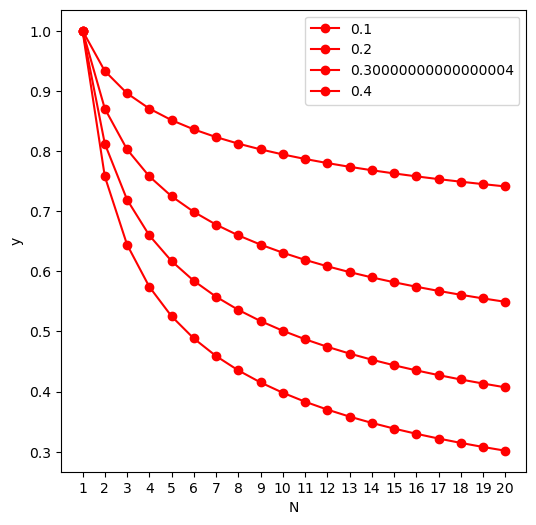

In [3]:
y = dict()
N = np.arange(1,21) # Makes an array with the numbers 1 through 20 
a = 1 
b = np.arange(0.1,0.4,0.1)
for j in range(len(b)):
    y[j] = a*N**(-b[j])
#make a quick plot
plt.figure(figsize = (6,6))
for j in range(len(b)):
    plt.plot(N,y[j],'ro-',label = b[j])
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('y')
plt.legend()
plt.show()

## Exponential Function 

### $$ y = ae^{-b(N-1)} $$

### Here y is a behavioral measure like response time, N indexes the trials starting at 1. 
### a,b,c are the **parameters** of the model. 
### Note that in an exponential model, N-1 is needed, so that a still captures the starting value.  




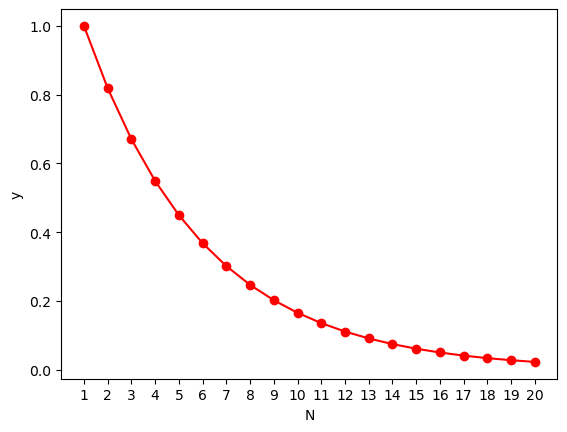

In [4]:
N = np.arange(1,21) # Makes an array with the numbers 1 through 20 
a = 1 
b = 0.2 
y = a*np.exp(-b*(N-1))
#make a quick plot
plt.plot(N,y,'ro-')
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('y')
plt.show()

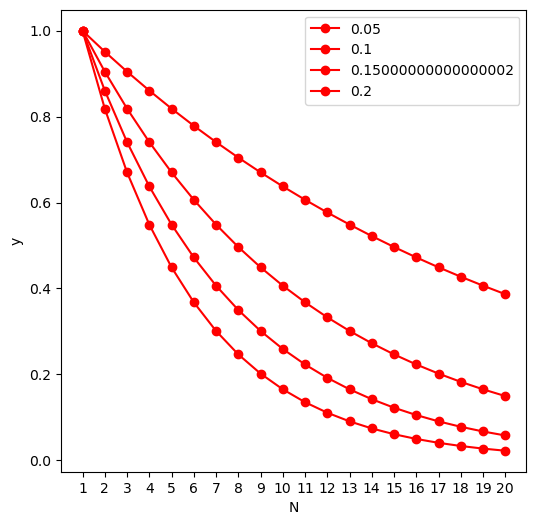

In [5]:
y = dict()
N = np.arange(1,21) # Makes an array with the numbers 1 through 20 
a = 1 
b = np.arange(0.05,0.25,0.05)
for j in range(len(b)):
    y[j] = a*np.exp(-b[j]*(N-1))
#make a quick plot
plt.figure(figsize = (6,6))
for j in range(len(b)):
    plt.plot(N,y[j],'ro-',label = b[j])
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('y')
plt.legend()
plt.show()

### Example: Power Law of Practice: Repealed?  

### Across a large variety of psychological experiments, 
* ####  simple reaction time
* ####  choice reaction time 
* ####  digit span
* ####  match to sample
#### ....
### the power law of practice came into wide use, because it provided a useful way to capture how people improved performance with practice. 
###  In 2000, a paper was published, 
#### Heathcote, A., Brown, S., & Mewhort, D. J. K. (2000). The power law repealed: The case for an exponential law of practice. Psychonomic Bulletin & Review, 7(2), 185-207.
### which showed that previous studies all used aggregated data across subjects in fitting a power law, and that individual subject data was better fit by an exponential law. 

### Why does this matter? 

### The two laws capture different ideas about learning.  Consider the m and m + 1 trial under each law. 

### Power Law 

$$ y[m] = am^{-b} $$
$$ y[m+1] = a(m+1)^{-b} $$

$$ y[m+1]/y[m] = \frac{m+1}{m}^{-b} $$

### Exponential Law 

$$ y[m] = ae^{-b(m-1)} $$
$$ y[m+1] = ae^{-bm} $$

$$ y[m+1]/y[m] = e^{-b}$$

### In the Power Law, the amount of change in the function y (learning) decreases as the number of trials (N) increases.
### In the Exponential Law, the amount of change in the function y (learning) is a constant.   

## Fitting Power Functions with a Linear Model

### $$ y = aN^{-b} $$

### $$ log(y) = log(a) -b*log(N) $$

### A log transform is your friend 

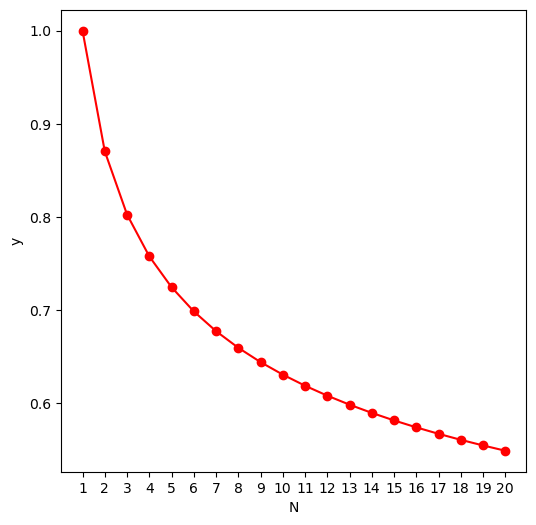

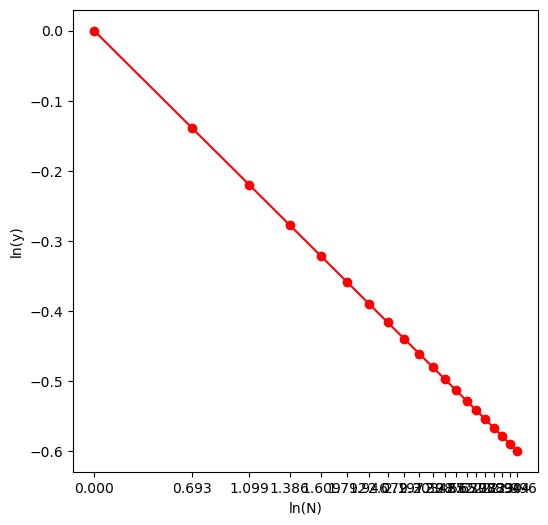

In [6]:
N = np.arange(1,21) # Makes an array with the numbers 1 through 20 
a = 1 
b = 0.2 
y = a*N**(-b)
#make a quick plot
plt.figure(figsize = (6,6))
plt.plot(N,y,'ro-')
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('y')
plt.show()
#log transform 
ylog = np.log(y)
Nlog = np.log(N)
plt.figure(figsize = (6,6))
plt.plot(Nlog,ylog,'ro-')
plt.xlabel('ln(N)')
plt.xticks(Nlog)
plt.ylabel('ln(y)')
plt.show()

## Fitting Exponential Functions with a Linear Model

### $$ y = ae^{-b(N-1)} $$

### $$ ln(y) = ln(a) -b*(N-1) $$

### A log transform is your friend 

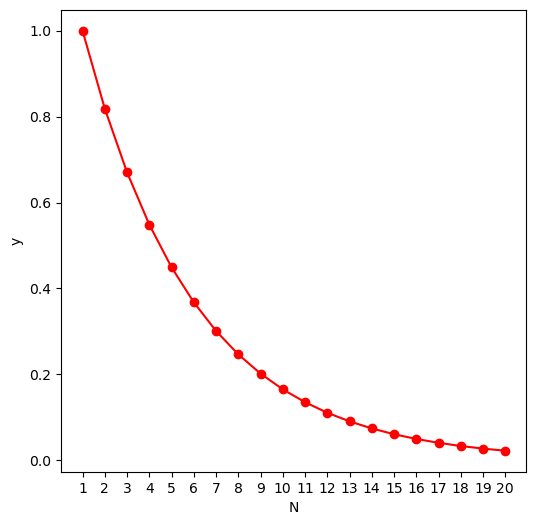

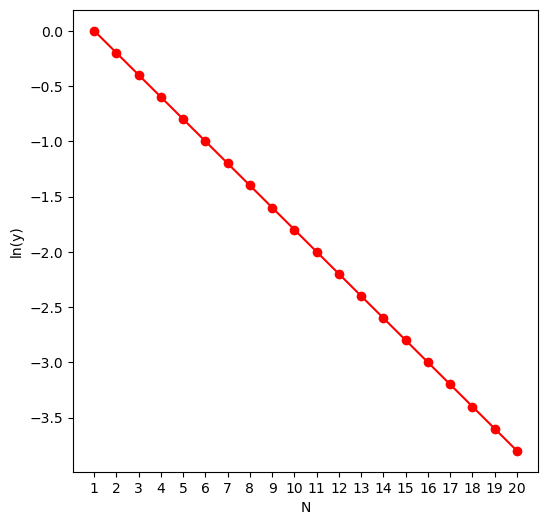

In [7]:
N = np.arange(1,21) # Makes an array with the numbers 1 through 20 
a = 1 
b = 0.2 
y = a*np.exp(-b*(N-1))
#make a quick plot
plt.figure(figsize = (6,6))
plt.plot(N,y,'ro-')
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('y')
plt.show()
#log transform 
ylog = np.log(y)
plt.figure(figsize = (6,6))
plt.plot(N,ylog,'ro-')
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('ln(y)')
plt.show()

## Fitting the Power Law 
### Using a Linear Regression Model 

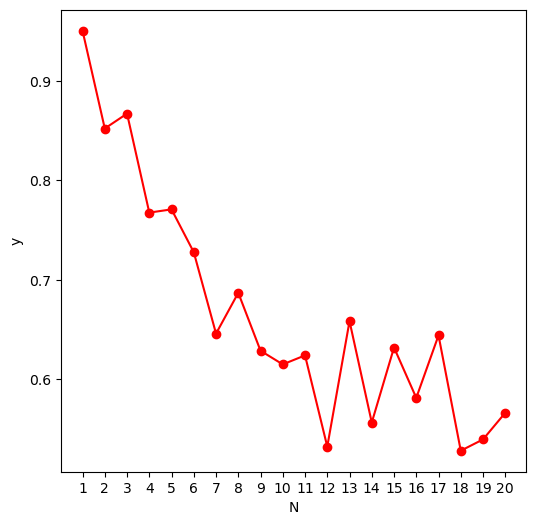

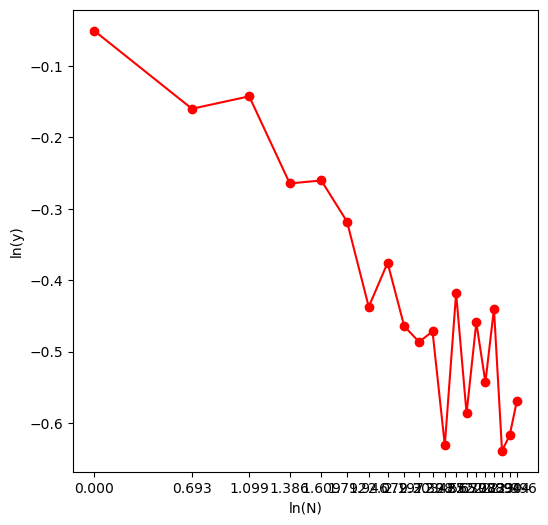

In [8]:
N = np.arange(1,21) # Makes an array with the numbers 1 through 20 
a = 1 
b = 0.2 
y = a*N**(-b)
#noise 
noise_std = 0.05
noise = rng.normal(0,noise_std,20)  #When we add noise, usually it makes the most sense to have it have a mean of 0.  
y = y+noise
#make a quick plot
plt.figure(figsize = (6,6))
plt.plot(N,y,'ro-')
plt.xlabel('N')
plt.xticks(N)
plt.ylabel('y')
plt.show()
#log transform 
ylog = np.log(y)
Nlog = np.log(N)
plt.figure(figsize = (6,6))
plt.plot(Nlog,ylog,'ro-')
plt.xlabel('ln(N)')
plt.xticks(Nlog)
plt.ylabel('ln(y)')
plt.show()

In [9]:
slope, intercept, r_value, p_value, std_err = stats.linregress(Nlog,ylog)
a_estimate= np.exp(intercept)
b_estimate = -slope
rsquared = r_value**2

### The logarithm is your friend in data exploration.  

## Nonlinear Functions and Least Squares 

### Linear, Exponential, and Power law models all have the advantage that they can be re-expressed as linear models, and easily fit using linear regression. 

### But, we often encounter many other types of models in Psychology and Neuroscience that cannot be easily fit with linear model methods

### In perception, and neuroscience, the ubiquitous model is the sigmoid function

In [10]:
def sigmoid(params, x):
    '''
    params: is a list or numpy array containing two parameters
    x: are the model inputs
    '''
    p0 = params[0] #SLOPE OF SIGMOID
    p1 = params[1] #MEAN OF SIGMOID
    y = 1/(1+np.exp(-p0*(x-p1)))
    return y 

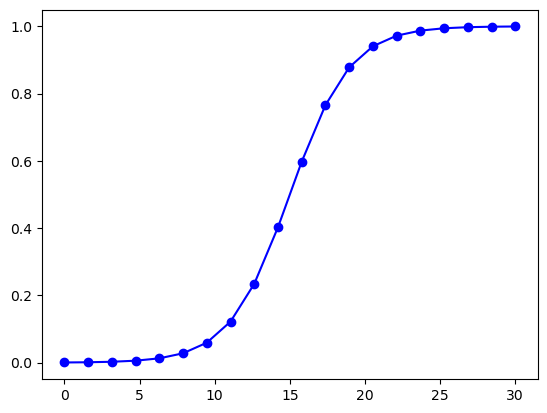

In [11]:

N = 20
x = np.linspace(0,30,N) 
true_parameters = [0.5,15] #SLOPE AND MEAN
y = sigmoid(true_parameters,x)
plt.figure() 
plt.plot(x,y,'bo-',label = 'true')


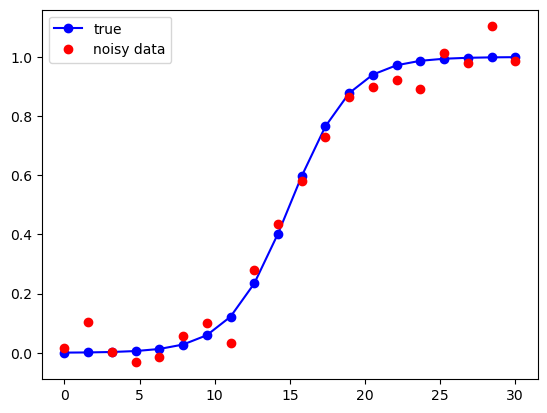

In [12]:
sdnoise = 0.05 
ydata = y + np.random.normal(0,sdnoise,N)
plt.plot(x,y,'bo-',label = 'true')
plt.plot(x,ydata,'ro',label='noisy data')
plt.legend()
plt.show()

In [13]:
def rmse(params,x,data):
    yhat = sigmoid(params, x)
    error = np.sum((data-yhat)**2)
    return error

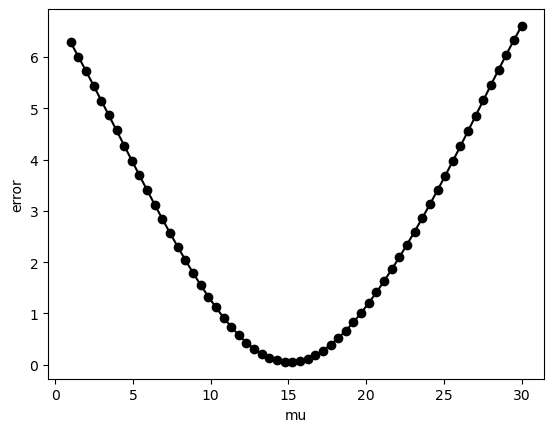

In [14]:
mumat = np.linspace(1,30,60) #DIFFERENT POSSIBLE VALUES OF MU
error = np.zeros(60)
for j in range(60):
    error[j] = rmse([0.5,mumat[j]],x,ydata) #COMPUTE ERRORS FOR DIFFERENT VALUES OF MU
plt.figure()
plt.plot(mumat,error,'ko-')
plt.xlabel('mu')
plt.ylabel('error')
plt.show()


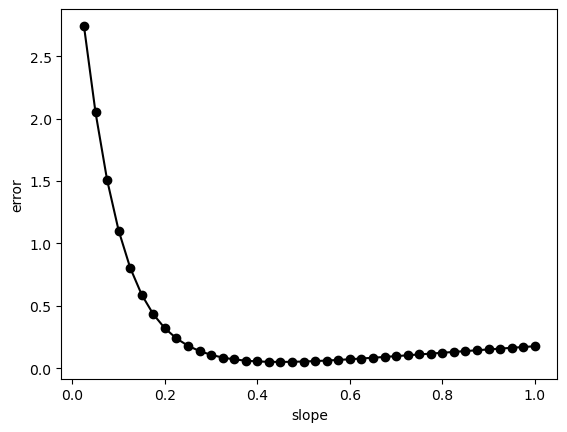

In [15]:
#FOR SLOPE ONLY 
slopemat = np.linspace(0.025,1,40) #DIFFERENT VALUES OF SLOPE
error = np.zeros(40)
for j in range(40):
    error[j] = rmse([slopemat[j],15],x,ydata) #COMPUTE ERRORS FOR DIFFERENT VALUES OF SLOPE
plt.figure()
plt.plot(slopemat,error,'ko-')
plt.xlabel('slope')
plt.ylabel('error')
plt.show()

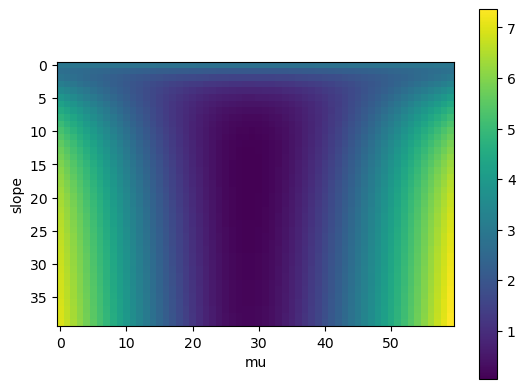

In [16]:
#FOR BOTH SLOPE AND MEAN 
error2 = np.zeros((40,60))
for j in range(40):
    for k in range(60):
        error2[j,k] = rmse([slopemat[j],mumat[k]],x,ydata) #COMPUTE ERRORS FOR BOTH
plt.figure()
plt.imshow(error2) 
plt.xlabel('mu')
plt.ylabel('slope')
plt.colorbar()
plt.show()

## Nonlinear Least Squares Fitting aka **Optimization**

### The least squares fit can be applied to problems with arbitrary functions.  
### Whether they are actually successful in providing the "best" or even a "good" fit to the data is a complex question involving a number of factors. 
### These factors also influence what kind of algorithm you would use to search for the minimum.\\

* #### Is there a single minima or are there multiple (local) minima of the error function? This determines if you can use **greedy** algorithms.  
* #### Trade-off between model complexity and ability to fit the model.  
* #### If the number of parameters is very large, finding the solution can be very slow. 

### What is the goal of the model fitting? 

### Fitting Psychometric Functions

### In cognitive science research we often have to fit psychometric functions to data.\\ 
### Psychometric functions relate behavioral performance to stimulus intensity (or duration) \\
![Psychometric Function](images/psychometric.jpg "Psychometric Function")


### Old-School: Simplex (Nelder-Mead Simplex)

###  Nelderâ€“Mead Simplex in n dimensions maintains a set of n + 1 test points arranged as a simplex. Examples of simplices include a line segment on a line, a triangle on a plane, a tetrahedron in three-dimensional space and so forth.   

![ ](images/simplex.png "Simplex Algorithm")

### The simplex algorithm is popular because of its simplicity, and its a "derivative-free" method for **optimization**.
* #### Simplex is slow. 
* #### Simplex does not scale well.  If there are more than 4 parameters in a model it converges very slowly.

### Gradient Descent Methods - Levenberg-Marquardt algorithm 

### Gradient Descent is probably the widely used optimization algorithm.
### In a gradient descent, at each step in the optimization the derivative of the error function (e.g., root mean square error) is evaluated in each possible direction in the parameter space.
### For example if there is one parameters, the derivative will be positive in one direction and negative in the other direction.  In this case we take a step in the negative direction to reduce the error. 
### With more parameters there are more dimensions we can walk along, and so it can be useful to determine which direction (in 2, 3 or even higher dimensions) will have the highest (negative) gradient. 
### The LM algorithm improved on this process by taking account of second derivative information to optimize the step size along each direction. 
### In Neural Network or Deep Learning models (Artificial Intelligence), Gradient Descent is the basic method to fit the model.  They use a variation called Stochastic Gradient Descent, which I will explain if we get there.  

### Challenges for Gradient Descent and any other "Greedy" optimization methods 
### Gradient Descent Algorithms are known as local optimization methods, or colloquially as "greedy" optimization algorithms. 
### They seek the local path through the space of parameters that will most rapidly minimize the loss (or cost) function (in our case, the negative log likelihood).  
![ ](images/localminima1d.png)
![ ](images/localminima2d.png)
### In practice they will also fail if the gradient is too shallow and the algorithm does not detect much change in the error function as the parameters are changed.   